# <center>Day 2: matching models with fully transferable utility</center>
### <center>Alfred Galichon (NYU)</center>
## <center>'math+econ+code' masterclass on equilibrium transport and matching models in economics</center>
<center>© 2020 by Alfred Galichon.  Support from  NSF DMS-1716489 and ERC CoG-866274 EQUIPRICE grants is acknowledged.</center>

#### <center>with R code, from the original Python code</center>

**If you reuse code from this masterclass, please cite as:**<br>
Alfred Galichon, 'math+econ+code' masterclass on equilibrium transport and matching models in economics, June 2020. https://github.com/math-econ-code/mec_equil


# References

## Textbooks
* Pierre-André Chiappori (2017). *Matching with Transfers: The Economics of Love and Marriage*. Princeton.
* Alfred Galichon (2016). *Optimal transport methods in economics*. Princeton.

## Papers

* Eugene Choo and Aloysius Siow (2006). "Who marries whom and why." *Journal of Political Economy* 114, no. 1, pp. 175-201.
* Alfred Galichon and Bernard Salanié (2015). "Cupid's invisible hands: Social Surplus and Identification in Matching Models". Preprint.
* Arnaud Dupuy, Alfred Galichon, Sonia Jaffe, and Scott Kominers (2020). "Taxation in matching markets". *International Economic Review*, forthcoming. 

# Matching with no taxes

## Generating worker and firm data

We will consider an academic job market, where candidate professors match with colleges--or rather, academic positions, as each position can only be filled by one applicant. 

A professor $x$ has characteristics $\xi(x) \in \mathbb{R}^d$ where $\xi$ includes measures of skills, such as general skills<br>
$\xi_0$=teaching ability,<br>
$\xi_1$=research ability, and<br>
$\xi_2$=collegiality<br>
as well as specific skills, like<br>
$\xi_3$=proficiency in micro<br>
$\xi_4$=proficiency in macro<br>
$\xi_5$=proficiency in econometrics<br>
and in addition, let's assume $\xi$ also encodes geographic coordinates of the applicant's residential address<br>
$\xi_6$=residential address horizontal geographic coordinate<br>
$\xi_7$=residential address vertical geographic coordinate<br>


and each college offer one position $y$ with characteristics $\zeta(y) \in \mathbb{R}^d$, where $\zeta_k$=how much one unit of characteristics $k$ is valued (in dollar terms) for this position, for $k\in\{0,...,5\}$ and $\zeta_6,\zeta_7$ = college location's geographic coordinates.

We assume that the amenity that worker $x$ associates with working for position $y$ is equal to minus the Euclidian distance between her location and the position's location, that is
$$\alpha_{xy} = - \sqrt{(\xi_{x6} - \zeta_{y6})^2+(\xi_{x7} - \zeta_{y7})^2}.$$

We assume that the output $\gamma_{xy}$ that worker $x$ produces if she takes position $y$ is a CES function where specific/general skills are more or less substituable 
$$\gamma_{xy}=\left( \left(\sum_{k\in\{0,...,2\} }(\xi_{xk} \zeta_{yk})^{r_g} \right)^{r/{r_g}}+
\left(\sum_{k\in\{3,...,5\} }(\xi_{xk} \zeta_{yk})^{r_s} \right)^{r/{r_s}} \right)^{1/r}.$$


## Generating demand and supply

We shall take 50 applicants, 30 positions, $r_g = .8$, $r_s = .6$ and $r = .7$.

In [1]:
if (!require("pacman")) install.packages("pacman")
library('pacman')

set.seed(777)
d = 8
nbx = 50
nby = 30

rg = .8
rs = .6
r = .7

temp = 1

n_x = rep(1, nbx)
m_y = rep(1, nby)
xi_x_k = matrix(runif(nbx * d), nrow = nbx, ncol = d)
zeta_y_k = matrix(runif(nby * d), nrow = nby, ncol = d)

gamma_x_y = alpha_x_y = matrix(0, nrow = nbx, ncol = nby)

c1 = expand.grid(xi_x_k[ , 7], zeta_y_k[ , 7])
c2 = expand.grid(xi_x_k[ , 8], zeta_y_k[ , 8])
alpha_x_y = - sqrt((c1[, 1] - c1[, 2])^2 + (c2[, 1] - c2[, 2])^2) / 50
alpha_x_y = matrix(alpha_x_y, nrow = nbx, ncol = nby)

d1 = do.call(cbind, lapply(1:6, FUN = function(x) expand.grid(xi_x_k[, x], zeta_y_k[, x])))
d2 = rowSums(do.call(cbind, lapply(c(1, 3, 5), function(x) (d1[, x] * d1[, x+1])^rg)))^(r / rg)
d3 = rowSums(do.call(cbind, lapply(c(7, 9, 11), function(x) (d1[, x] * d1[, x+1])^rs)))^(r / rs)
gamma_x_y = matrix((d2 + d3)^(1/r), nrow = nbx, ncol = nby)

Phi_x_y = alpha_x_y + gamma_x_y
K_x_y = temp * exp((Phi_x_y)/(2*temp))

Loading required package: pacman



## Wage determination

Let $w_{xy}$ be the wage that college $y$ would be willing to pay to employee $x$, to be determined. Start by assuming that there are no taxes, so if $x$ and $y$ match, then their payoff are respectively:
$$U_{xy} = \alpha_{xy} + w_{xy}\\
V_{xy}= \gamma_{xy} - w_{xy} $$
while we assume that these payoffs are zero if $x$ and $y$ do not match.

## The equilibrium assignment problem

See class notes.

## The Choo-Siow model


See class notes: when adding logit heterogeneity, we obtaine equilibrium relations:<br>
$\mu_{xy} = \exp(\frac {\Phi_{xy} - a_x - b_y} {2T} )$<br>
$\mu_{x0} = \exp(\frac {- a_x} {T})$<br>
$\mu_{0y} = \exp(\frac {- b_y} {T})$

Matching equilibrium equations become<br>
$\left\{
\begin{array}
[c]{l}%
n_x = \exp(\frac {- a_x} {T}) + \sum_{y\in \mathcal{Y}}\exp(\frac {\Phi_{xy} - a_x - b_y} {2T} )\\
m_y = \exp(\frac {- b_y} {T}) + \sum_{x\in \mathcal{X}}\exp(\frac {\Phi_{xy} - a_x - b_y} {2T} )
\end{array}
\right.$




## The Choo-Siow model as an optimization problem

Note that the previous equations are the first order conditions of the following optimization problem:<br>
$$\min_{a,b} f_{xy} := \left\{ \sum_x a_x n_x + \sum_y b_y m_y + 2T \sum_{xy} e^{ \frac {\Phi_{xy} - a_x - b_y} {2T} }+ T \sum_x e^{\frac {-a_x} {T}} + T \sum_y e^{\frac {-b_y} {T}} \right\}$$
that is, setting $A_x =\exp(-a_x / (2T)) $ and $B_y =\exp(-b_x / (2T)) $,<br>
$$\min_{A,B} F(A,B):= \left\{ - \sum_x n_x \log A_x  - \sum_y m_y \log B_y + 2 \sum_{xy} K_{xy} A_x B_y + T \sum_x A^2_x + T \sum_y B^2_y \right\}$$
where<br>
$K_{xy} = T \exp( \Phi_{xy} / (2T) ).$<br>
One has:<br>
$\frac{ \partial F} {\partial A_x}  = 2 A_x - \frac {n_x} {A_x} + \sum_y K_{xy} B_y$<br>
$\frac{ \partial F} {\partial B_y}  = 2 B_y - \frac {m_y} {B_y} + \sum_x K_{xy} A_x,$


In [2]:
fxy_ChooSiow <- function(ab) { # function `f' in Alfred's code
  a <- ab[1:nbx]
  b <- ab[nbx+1:nby]

  criterion = sum(n_x * a) + sum(m_y * b)  + 
              2 * temp * sum(sum(exp((Phi_x_y - a - b)/(2*temp)))) + 
              temp * sum(exp(- a / temp)) +  temp * sum(exp(- b / temp))
  criterion
}

gradients <- function(ab) { # function `gradf_xy' in Alfred's code
  a <- ab[1:nbx]
  b <- ab[nbx+1:nby]

  c(n_x - exp(- a / temp) - rowSums(exp((Phi_x_y - a - b)/(2*temp))),
    m_y - exp(- b / temp) - colSums(exp((Phi_x_y - a - b)/(2*temp))))
}

result <- stats::optim(runif(nbx + nby), fxy_ChooSiow, method = "BFGS", gr = gradients)

a <- result$par[1:nbx]
b <- result$par[nbx+1:nby]

mu_x_0 = exp(- a / temp)
mu_x_0
mu_0_y = exp(- b / temp)
mu_0_y

# fundamental differences in the estimates by Alfred and mine.

mu_x_y = exp((Phi_x_y - a - b)/(2*temp))

[1] 5.740655e-10 1.158327e-03 9.857315e-01 1.861230e-02 3.273098e-07
 [6] 8.663126e-04 4.119362e-02 7.538746e-04 3.061388e-24 5.134703e-03
[11] 9.345024e-05 4.179590e-04 9.837094e-01 4.712570e-02 1.346984e-14
[16] 4.016484e-03 5.274093e-01 6.015133e-04 1.434628e-03 1.556509e-03
[21] 8.799543e-04 2.971104e-04 9.835077e-01 1.906566e-02 9.594915e-01
[26] 1.462929e-04 6.553138e-01 9.921785e-04 1.344572e-03 6.652256e-04
[31] 1.278515e-05 1.309863e-04 9.945887e-01 3.835580e-02 7.841167e-02
[36] 2.328234e-04 6.605917e-01 2.183139e-04 1.326749e-03 8.055986e-06
[41] 1.825963e-04 2.438184e-04 6.841707e-01 1.463886e-02 5.351446e-01
[46] 2.649014e-04 6.925046e-01 4.429256e-04 1.908001e-03 1.165198e-02

[1] 2.412682e-01 1.890176e-01 4.253409e-82 1.309355e-04 4.410966e-22
 [6] 3.242742e-01 5.588549e-05 1.314695e-30 1.832850e-01 2.990108e-15
[11] 2.104153e-01 7.441940e-04 2.931861e-33 6.444602e-45 3.457805e-07
[16] 4.249453e-13 1.032927e-14 3.100300e-01 1.227161e-39 1.404343e-01
[21] 3.132595e-04 4.246225e-01 8.411175e-19 1.915139e-02 7.165178e-14
[26] 1.685930e-01 4.309994e-23 4.312790e-01 2.236301e-07 5.667590e-32

In [3]:
A = sum(sum(alpha_x_y * mu_x_y))
B = sum(sum(gamma_x_y * mu_x_y))
A
B

[1] -0.3308667

[1] 103.4746

## The Choo-Siow model as an equilibrium problem with GS

Can we reformulate as a competitive equilibrium problem with Gross Substitutes?

Define $p\in \mathbb{R}^{\mathcal{X}\cup\mathcal{Y}}$ by<br>
$p_x = a_x, x\in\mathcal{X}$<br>
$p_y = -b_y, y\in\mathcal{Y}$<br>
and define $q \in \mathbb{R}^{\mathcal{X}\cup\mathcal{Y}}$ by<br>
$q_x = -n_x, x\in\mathcal{X}$<br>
$q_y = b_y, y\in\mathcal{Y}.$<br>

Define<br>
$\left\{
\begin{array}
[c]{l}%
e_x(p) = - \exp(\frac {- p_x} {T}) - \sum_{y\in \mathcal{Y}}\exp(\frac {\Phi_{xy} - p_x + p_y} {2T} )\\
e_y(p) = \exp(\frac {p_y} {T}) + \sum_{x\in \mathcal{X}}\exp(\frac {\Phi_{xy} - p_x +p_y} {2T} )
\end{array}
\right. $

so that the equilibrium problem reformulates as $$e(p)=q.$$

In [4]:
pacman::p_load("microbenchmark")

IPFP <- function(Phi_x_y, tol1 = 1e-12, tol2 = 1e-5) {

  K_x_y = exp((Phi_x_y)/(2*temp))
  
  A_x = rep(1, nbx)
  B_y = rep(1, nby)
  
  i = 1
  
  converge1 = converge2 = 10
  
  time <- microbenchmark::microbenchmark(
  while (converge1 > tol1 || converge2 > tol2) {
    A_x_ = sqrt(n_x + ((K_x_y %*% B_y)/2)^2) - (K_x_y %*% B_y)/2
    B_y_ = sqrt(m_y + ((t(K_x_y) %*% A_x)/2)^2) - (t(K_x_y) %*% A_x)/2
    converge1 = max(abs(c(A_x_ - A_x, B_y_ - B_y)))
    A_x = A_x_
    B_y = B_y_
    converge2 = max(c(abs(n_x - A_x^2 - (K_x_y %*% B_y) * A_x),
                      abs(m_y - B_y^2 - t(K_x_y) %*% A_x * B_y)))
    i = i + 1
  }, times = 1)
  
  cat("IPFP converged in", i, "iterations,", time$time/ 1e9, "seconds. \n")
  cat("Discrepancy for A_x:", converge1, "\n")
  cat("Discrepancy for B_y:", converge2, "\n")
  
  return(list('mu_x0' = as.vector(A_x^2), 'mu_0y' = as.vector(B_y^2), 'convertols' = c(converge1, converge2)))
}

IPFP(Phi_x_y)


IPFP converged in 90 iterations, 0.01227138 seconds. 
Discrepancy for A_x: 9.541257e-13 
Discrepancy for B_y: 6.352474e-12 


$mu_x0
 [1] 0.1161696 0.5633841 0.5158012 0.3917700 0.1591271 0.5611637 0.5334222
 [8] 0.5399029 0.1285517 0.5061781 0.1982796 0.4818241 0.4063563 0.4471443
[15] 0.1069094 0.7043610 0.5768765 0.4996199 0.3187422 0.3542079 0.4831459
[22] 0.4604830 0.2328617 0.4034182 0.4585488 0.2905491 0.3703827 0.5565491
[29] 0.3923051 0.2710634 0.5733505 0.3293357 0.4244362 0.4459049 0.3656475
[36] 0.3059474 0.3610638 0.4089390 0.2712375 0.1853295 0.3292968 0.4197224
[43] 0.6027395 0.3194508 0.5726741 0.2893027 0.3982812 0.5079686 0.3074038
[50] 0.5549588

$mu_0y
 [1] 1.575229e-04 9.443446e-05 5.091881e-06 5.794021e-05 2.725849e-05
 [6] 1.187545e-04 5.573462e-05 1.876938e-05 9.489098e-05 3.154222e-05
[11] 1.905949e-04 8.161790e-05 1.477798e-05 1.196295e-05 6.552922e-05
[16] 3.588296e-05 3.730248e-05 1.348840e-04 1.231790e-05 1.311003e-04
[21] 7.685506e-05 1.275150e-04 3.172702e-05 9.328082e-05 3.338803e-05
[26] 1.208729e-04 2.666242e-05 1.262445e-04 5.704601e-05 1.798867e-05

$convertols
[1] 9.541257e-13 6.352474e-12

# Matching with linear taxes

We now assume that the gross wage $w_{xy}$ is taxed at a linear rate $\tau$, that is<br>
$U_{xy} = \alpha_{xy} + (1-\tau) w_{xy}\\
V_{xy} = \gamma_{xy} - w_{xy},$<br>
so the matching problem is equivalent to a TU matching problem with surplus functions<br>
$\Phi^\tau_{xy} =  \alpha_{xy}   +  (1-\tau )  \gamma_{xy}.$



IPFP converged in 90 iterations, 0.00409669 seconds. 
Discrepancy for A_x: 9.541257e-13 
Discrepancy for B_y: 6.352474e-12 
IPFP converged in 90 iterations, 0.003976936 seconds. 
Discrepancy for A_x: 8.332224e-13 
Discrepancy for B_y: 3.519851e-12 
IPFP converged in 90 iterations, 0.004004881 seconds. 
Discrepancy for A_x: 4.815037e-13 
Discrepancy for B_y: 1.998179e-12 
IPFP converged in 88 iterations, 0.003890585 seconds. 
Discrepancy for A_x: 5.202505e-13 
Discrepancy for B_y: 1.886935e-12 
IPFP converged in 86 iterations, 0.003861919 seconds. 
Discrepancy for A_x: 7.507328e-13 
Discrepancy for B_y: 2.996492e-12 
IPFP converged in 86 iterations, 0.003860594 seconds. 
Discrepancy for A_x: 6.340484e-13 
Discrepancy for B_y: 1.816991e-12 
IPFP converged in 84 iterations, 0.003719998 seconds. 
Discrepancy for A_x: 9.003909e-13 
Discrepancy for B_y: 2.337242e-12 
IPFP converged in 84 iterations, 0.003941665 seconds. 
Discrepancy for A_x: 6.207257e-13 
Discrepancy for B_y: 1.594169e-12 
I

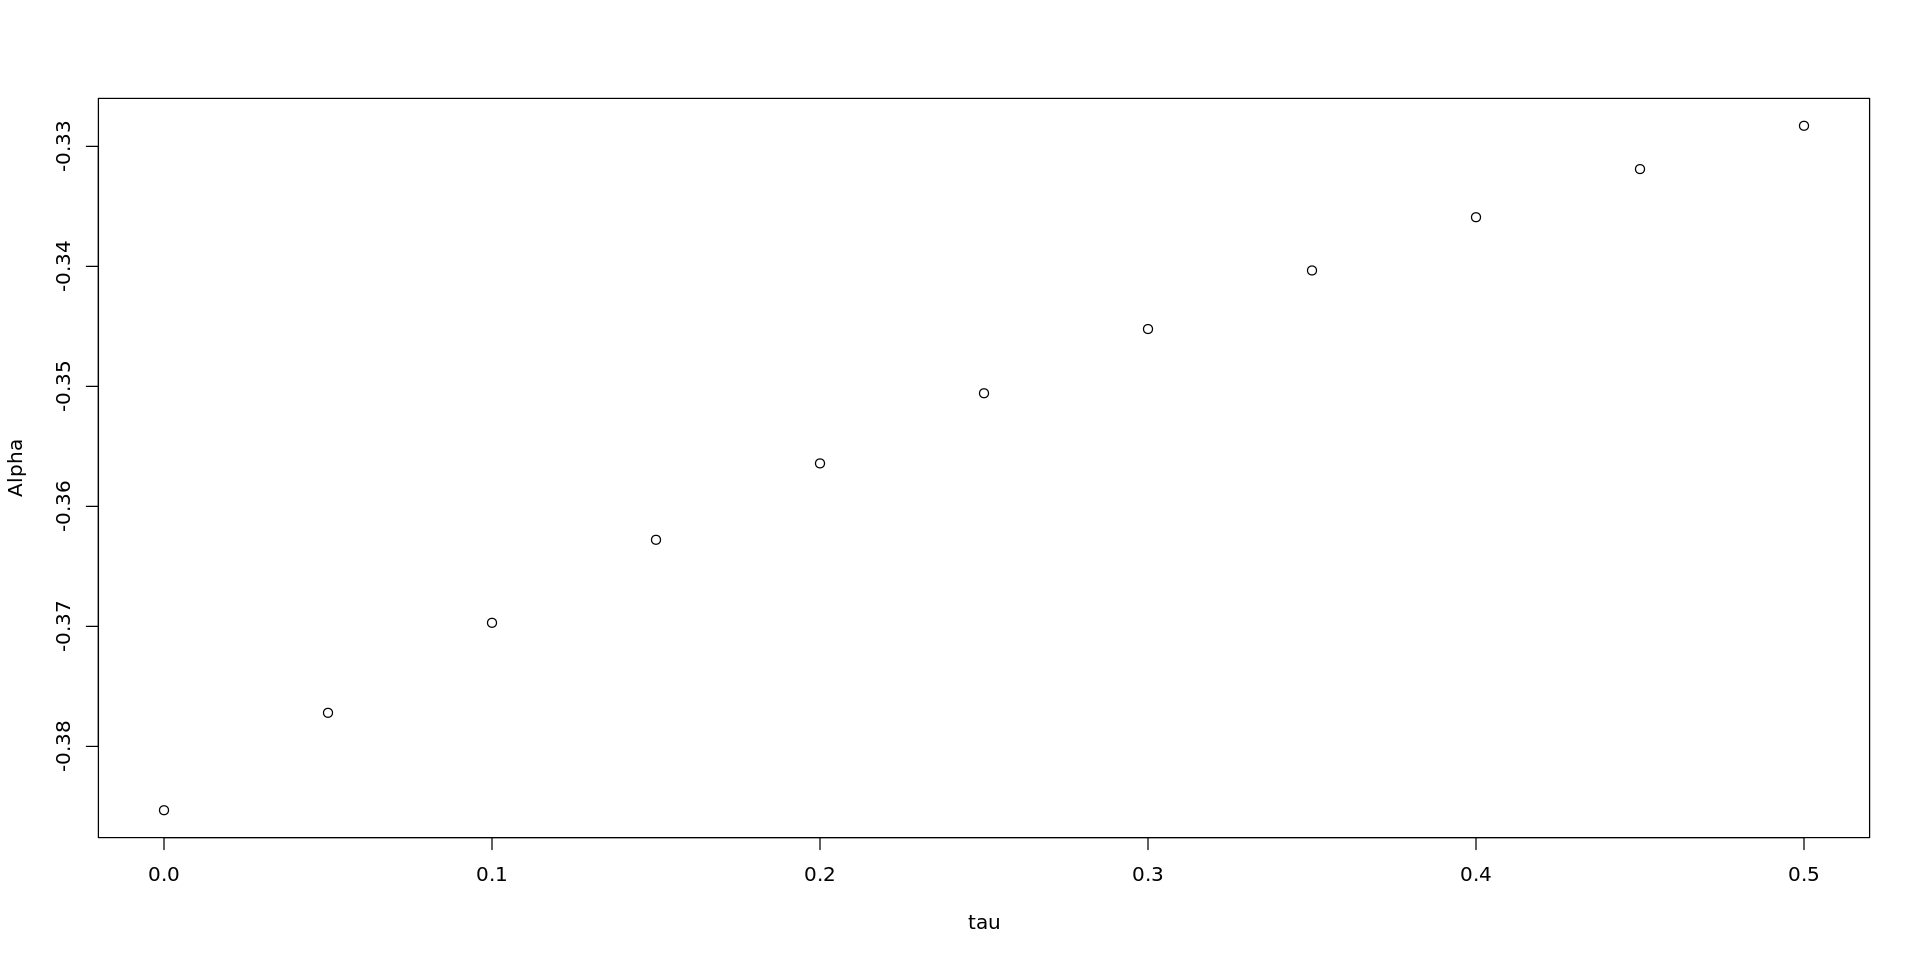

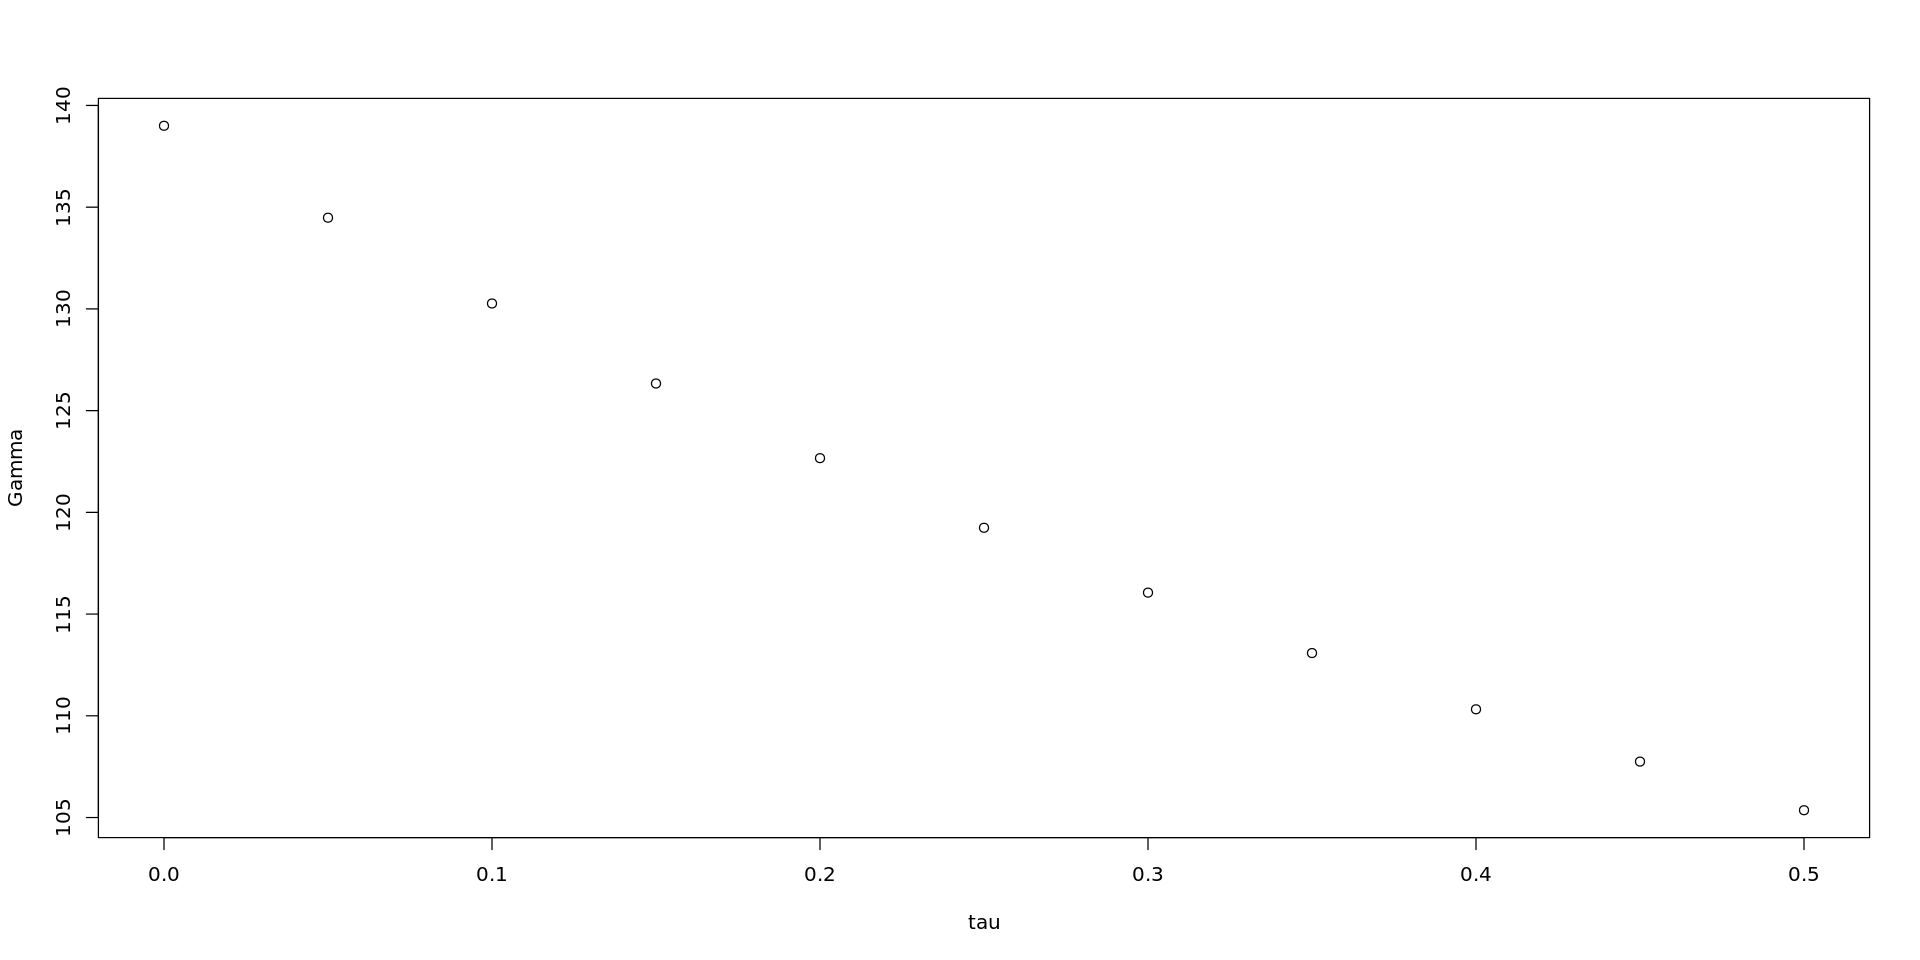

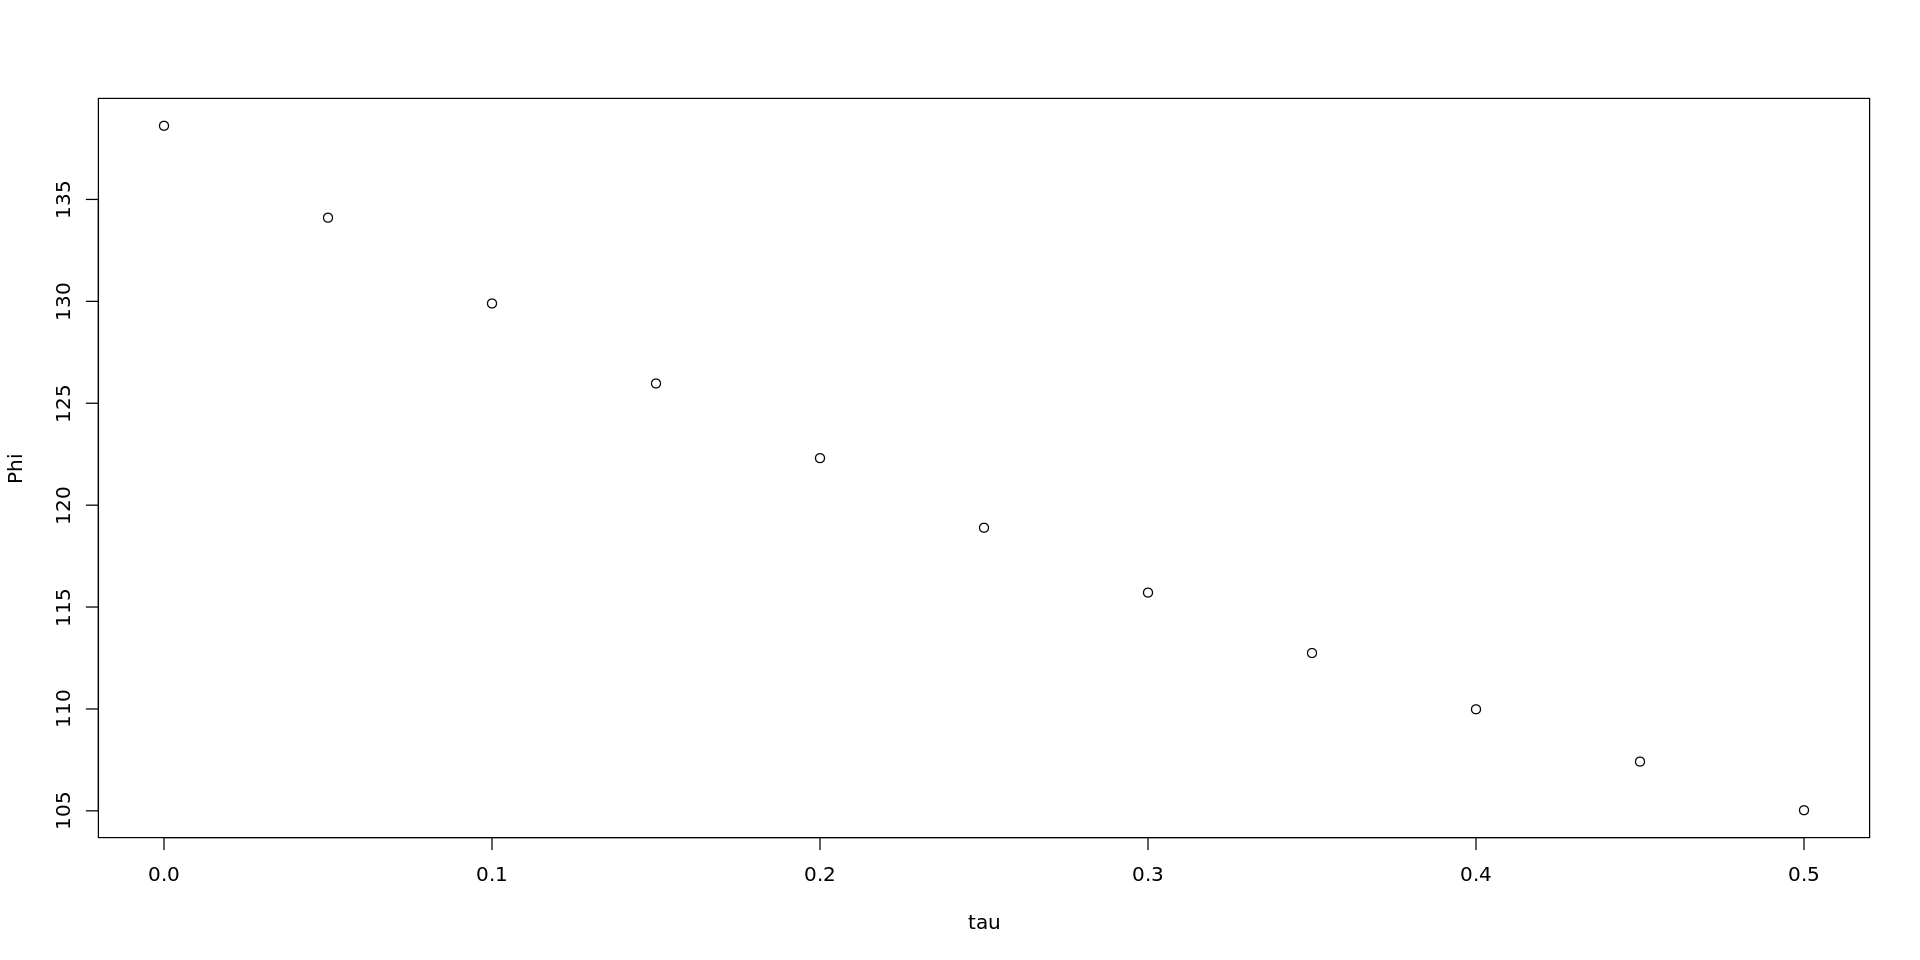

In [5]:
tau_k = seq(0, .5, .05)

PHI_k = ALPHA_k = GAMMA_k = rep(0, length(tau_k))

for (k in 1:length(tau_k)) {
  phitau_x_y <- alpha_x_y + (1 - tau_k[k]) * gamma_x_y
  AB <- IPFP(phitau_x_y)
  ax <- - temp * log(AB$mu_x0)
  by <- - temp * log(AB$mu_0y)
  mutau_x_y <- exp((phitau_x_y - ax - by) / 2*temp)
  ALPHA_k[k] <- sum(sum(mutau_x_y * alpha_x_y))
  GAMMA_k[k] <- sum(sum(mutau_x_y * gamma_x_y))
  PHI_k[k]   <- sum(sum(mutau_x_y * (gamma_x_y + alpha_x_y)))
}

library('repr')
options(repr.plot.width=16, repr.plot.height=8)

plot(tau_k, ALPHA_k, ylab = "Alpha", xlab = "tau")
plot(tau_k, GAMMA_k, ylab = "Gamma", xlab = "tau")
plot(tau_k, PHI_k, ylab = "Phi", xlab = "tau")